# Project 1: House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
# Here we can see that 5502 datas are null in Society column so we can remove "Society" column from our dataset. 

df1 = df.drop('society', axis=1)

In [6]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df1['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [8]:
# Here again most of data showing 'Ready to move' so we can also remove 'availability' column

df2=df1.drop('availability', axis=1)

In [9]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df2.shape

(13320, 7)

In [12]:
# Here we can see that the remaining null values are not huge so we can drop them

df3 = df2.dropna()  # It will drop all samples(rows) who has null values in them

In [13]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [14]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [15]:
df3.shape

(12710, 7)

In [16]:
df3.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [17]:
# The Size column contains BHK after the number so let's remove it

df3['size'] = df3['size'].apply(lambda x: int(x[0]))

C:\Users\lenovo\AppData\Local\Temp/ipykernel_7944/1430841634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['size'] = df3['size'].apply(lambda x: int(x[0]))


In [18]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [19]:
df3.dtypes

area_type      object
location       object
size            int64
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [20]:
# The 'total_sqft' must also be numeric for that

df3['total_sqft'].astype(float)

ValueError: could not convert string to float: '2100 - 2850'

In [23]:
# By using astype function we are getting an error because there also strings '2100 - 2850' like this so let's take its average

t = '2100 - 2850'
(float(t.split('-')[0]) + (float(t.split('-')[1])))/2

2475.0

In [24]:
def fix_total_sqft(x):
    try:
      if len(x.split('-')) > 1:
        return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
      else:
        return float(x)
    except:
      return 0

In [25]:
df3['total_sqft'] = df3['total_sqft'].apply(fix_total_sqft)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_7944/673023636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(fix_total_sqft)


In [26]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


In [27]:
(df3['total_sqft']==0).sum()

42

In [28]:
# Now we can remove this 0s from our dataset ( removing the datarows who has 0 values in total_sqft column)
df4 = df3[df3['total_sqft']!=0]

In [29]:
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


In [30]:
df4.shape

(12668, 7)

In [31]:
df4.dtypes

area_type      object
location       object
size            int64
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

In [32]:
# Statistical analysis of the data

df4.describe()

,size,total_sqft,bath,balcony,price
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,2.724029,1511.835167,2.616277,1.585649,105.952648
std,1.104660,1162.097276,1.223882,0.816758,131.813137
min,1.000000,5.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,49.015000
50%,3.000000,1260.000000,2.000000,2.000000,70.000000
75%,3.000000,1640.000000,3.000000,2.000000,115.000000
max,9.000000,52272.000000,40.000000,3.000000,2912.000000


In [33]:
# let's check is there any outlier or there prices are justified or not for that

df4['PPS'] = (df4['price'] * 100000) / df4['total_sqft']


C:\Users\lenovo\AppData\Local\Temp/ipykernel_7944/2904608075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['PPS'] = (df4['price'] * 100000) / df4['total_sqft']


In [34]:
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


<AxesSubplot:>

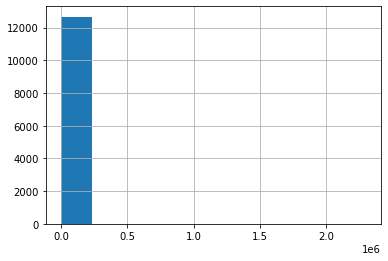

In [35]:
# Let's understand the range of pps column

df4['PPS'].hist()

<AxesSubplot:>

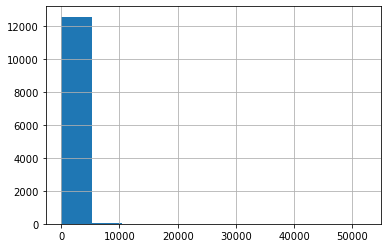

In [36]:
df4['total_sqft'].hist()

<AxesSubplot:>

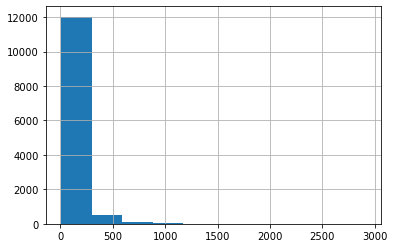

In [37]:
df4['price'].hist()

In [38]:
loc_count = df4['location'].value_counts()
loc_count

Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1259, dtype: int64

In [39]:
loc_count_more_than_50 = loc_count[loc_count>=50]
loc_count_more_than_50

Whitefield                  513
Sarjapur  Road              372
Electronic City             300
Kanakpura Road              259
Thanisandra                 230
Yelahanka                   206
Uttarahalli                 186
Hebbal                      173
Raja Rajeshwari Nagar       168
Marathahalli                164
7th Phase JP Nagar          146
Bannerghatta Road           144
Hennur Road                 142
Haralur Road                135
Electronic City Phase II    130
Rajaji Nagar                 99
Chandapura                   98
Bellandur                    91
Electronics City Phase 1     86
Hoodi                        86
KR Puram                     85
Begur Road                   83
Sarjapur                     80
Yeshwanthpur                 78
Kasavanhalli                 77
Harlur                       76
Banashankari                 74
Ramamurthy Nagar             71
Hormavu                      71
Kengeri                      70
Koramangala                  69
Hosa Roa

In [40]:
df5 = df4[df4['location'].apply(lambda x: x in loc_count_more_than_50)]
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
8,Super built-up Area,Marathahalli,3,1310.0,3.0,1.0,63.25,4828.244275


In [41]:
df5.groupby('location')['PPS'].min()

location
7th Phase JP Nagar          3465.346535
8th Phase JP Nagar          3181.818182
Akshaya Nagar               3200.000000
Banashankari                2999.163180
Bannerghatta Road           3034.482759
Begur Road                  2783.505155
Bellandur                   2922.077922
Bisuvanahalli               2883.720930
Budigere                    3950.216450
Chandapura                  2000.000000
Electronic City             1666.666667
Electronic City Phase II    2153.846154
Electronics City Phase 1    2478.698683
Haralur Road                3620.273532
Harlur                      3816.793893
Hebbal                      3454.545455
Hennur                      3899.268887
Hennur Road                 2800.185014
Hoodi                       3543.548387
Hormavu                     2777.777778
Hosa Road                   2992.125984
JP Nagar                    1363.636364
Jakkur                      2341.176471
Jalahalli                   3000.000000
KR Puram                    232

In [42]:
df5.groupby('location')['PPS'].aggregate(['min','max'])

,min,max
location,,
7th Phase JP Nagar,3465.346535,16666.666667
8th Phase JP Nagar,3181.818182,22500.000000
Akshaya Nagar,3200.000000,11347.517730
Banashankari,2999.163180,20833.333333
Bannerghatta Road,3034.482759,15933.333333
Begur Road,2783.505155,15000.000000
Bellandur,2922.077922,14285.714286
Bisuvanahalli,2883.720930,8372.093023
Budigere,3950.216450,11250.000000


<AxesSubplot:xlabel='location'>

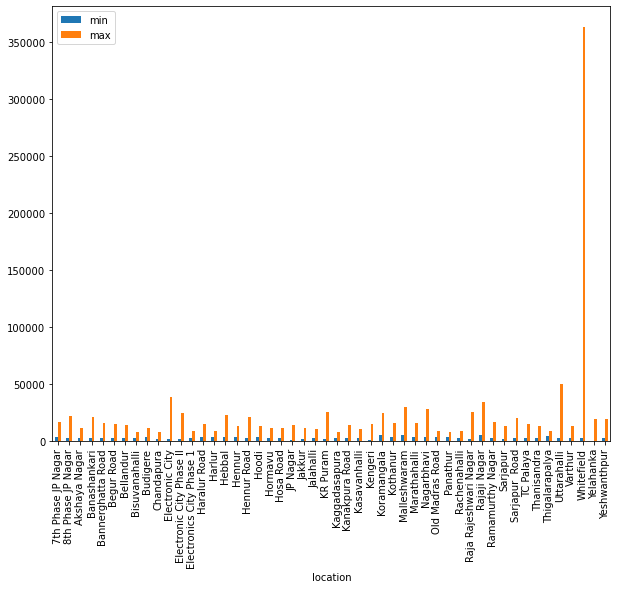

In [43]:
(df5.groupby('location')['PPS'].aggregate(['min','max'])).plot.bar(figsize = (10,8))

Finding Out outliers using histogram

<AxesSubplot:>

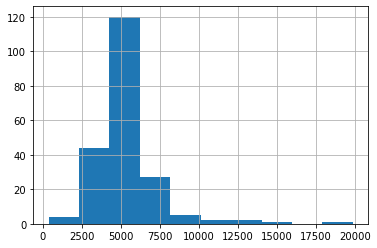

In [44]:
df5[df5['location'] == 'Yelahanka'].PPS.hist()

<AxesSubplot:>

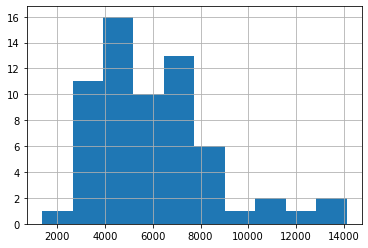

In [45]:
df5[df5['location'] == 'JP Nagar'].PPS.hist()

Finding out outliers using scatter plot

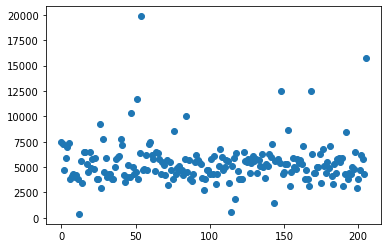

In [46]:
plt.scatter(range(len(df5[df5['location'] == 'Yelahanka'].PPS)), df5[df5['location'] == 'Yelahanka'].PPS)
plt.show()

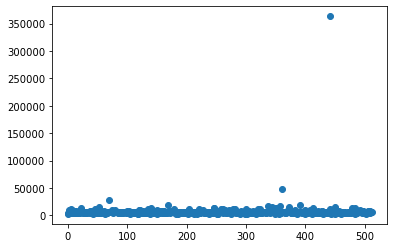

In [47]:
plt.scatter(range(len(df5[df5['location'] == 'Whitefield'].PPS)), df5[df5['location'] == 'Whitefield'].PPS)
plt.show()

In [48]:
# Now let's perform mean and standard deviation for that we will first create a data frame

In [49]:
df6 = pd.DataFrame()
for loc, dfloc in df5.groupby('location'):
    print(dfloc['PPS'])
    
# here loc is for Location and dfloc is for data in each location

12       3800.000000
226      6666.666667
252      7322.834646
281      7042.253521
343      8108.108108
            ...     
12695    5319.148936
13035    9047.619048
13056    5000.000000
13182    6338.028169
13234    7058.823529
Name: PPS, Length: 146, dtype: float64
137       5030.740568
377       6629.711752
513      13636.363636
849       3508.064516
1737      3999.058380
2373     12083.333333
2389      3536.585366
2723      5038.487973
2740      6314.580941
2983      3999.089253
3196      4444.444444
3286      4814.814815
4185      3518.518519
4219      3257.790368
4447      3240.740741
4641      3254.901961
4883      3999.058380
5369      6200.000000
5577      3181.818182
6125     13684.210526
6227      4380.952381
6299      3800.000000
6347      4499.449945
6769      5031.086273
6784      4736.842105
7244     11666.666667
7297      6000.000000
7662      3283.555556
7670      9166.666667
7746      3181.818182
7929      3999.081726
8167      4049.844237
8524      5518.617021
8685

In [50]:
df6 = pd.DataFrame()

for loc,dfloc in df5.groupby('location'):
  mean = dfloc['PPS'].mean()
  std = dfloc['PPS'].std()

  extracted_df = dfloc[(dfloc['PPS'] >= (mean - 2 * std)) & (dfloc['PPS'] <= (mean + 2 * std))]
  df6 = pd.concat([df6,extracted_df] , ignore_index=True)

In [51]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0,3800.000000
1,Built-up Area,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0,6666.666667
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0,7322.834646
3,Built-up Area,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0,7042.253521
4,Built-up Area,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0,8108.108108


In [52]:
# Now let's perform all task again 

In [53]:
df6.groupby('location')['PPS'].aggregate(['min','max'])

,min,max
location,,
7th Phase JP Nagar,3465.346535,11333.333333
8th Phase JP Nagar,3181.818182,13684.210526
Akshaya Nagar,3200.000000,8491.023775
Banashankari,2999.163180,15000.000000
Bannerghatta Road,3034.482759,8468.834688
Begur Road,2783.505155,6793.145655
Bellandur,2922.077922,8627.156789
Bisuvanahalli,2883.720930,5084.745763
Budigere,3950.216450,6371.191136


<AxesSubplot:xlabel='location'>

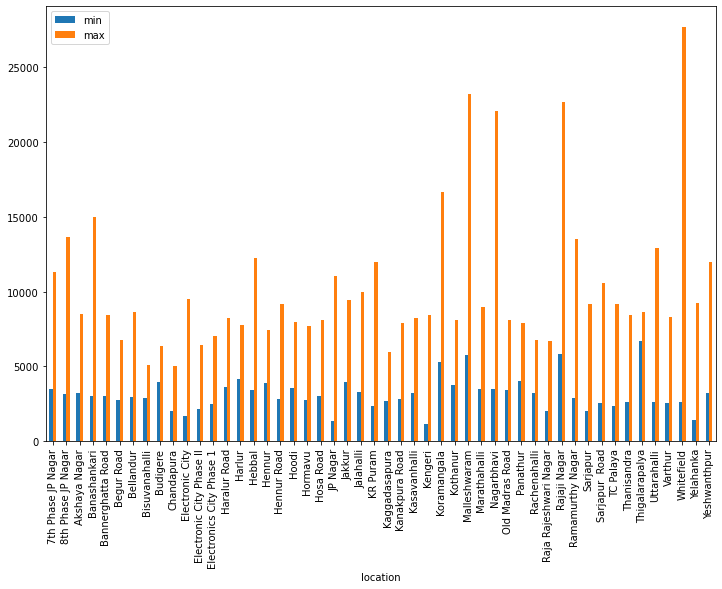

In [54]:
df6.groupby('location')['PPS'].aggregate(['min','max']).plot.bar(figsize=(12,8))

<AxesSubplot:>

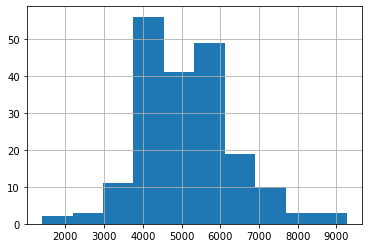

In [55]:
df6[df6['location'] == 'Yelahanka'].PPS.hist()

<AxesSubplot:>

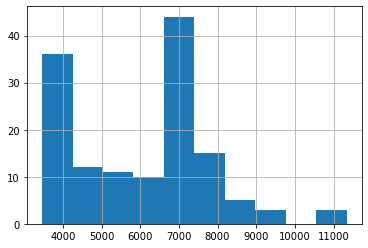

In [56]:
df6[df6['location'] == '7th Phase JP Nagar'].PPS.hist()

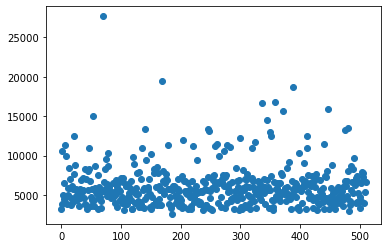

In [57]:
plt.scatter(range(len(df6[df6['location'] == 'Whitefield'].PPS)), df6[df6['location'] == 'Whitefield'].PPS)
plt.show()

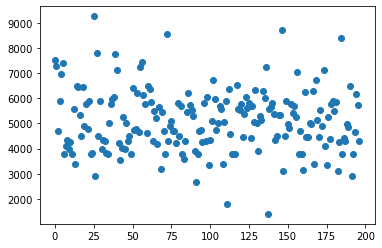

In [58]:
plt.scatter(range(len(df6[df6['location'] == 'Yelahanka'].PPS)), df6[df6['location'] == 'Yelahanka'].PPS)
plt.show()

In [59]:
df6.shape

(5460, 8)

In [60]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0,3800.000000
1,Built-up Area,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0,6666.666667
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0,7322.834646
3,Built-up Area,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0,7042.253521
4,Built-up Area,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0,8108.108108


In [61]:
df6.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,2.550000,1474.759865,2.458059,1.573626,89.270452,5613.867387
std,0.836666,758.221403,0.939788,0.781425,94.332799,2405.843356
min,1.000000,276.000000,1.000000,0.000000,9.000000,1166.666667
25%,2.000000,1115.000000,2.000000,1.000000,47.000000,4132.231405
50%,2.000000,1275.000000,2.000000,2.000000,65.280000,5172.016703
75%,3.000000,1620.000000,3.000000,2.000000,98.407500,6461.102325
max,9.000000,12000.000000,10.000000,3.000000,2200.000000,27692.307692


In [62]:
df7 = df6.drop('PPS', axis=1)

In [63]:
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0
1,Built-up Area,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0
3,Built-up Area,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0
4,Built-up Area,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0


In [64]:
df7['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [65]:
df7['area_type'].value_counts()

Super built-up  Area    4257
Built-up  Area           855
Plot  Area               323
Carpet  Area              25
Name: area_type, dtype: int64

In [66]:
# Now we can see that 'super built-up area' has higher value so we will convert all other value with 'other' so we will have just 2 value to deal.

def fix_area_type(x):
    if x!='Super built-up  Area':
        return 'Others'
    else:
        return x

In [67]:
df7['area_type'] = df7['area_type'].apply(fix_area_type)

In [68]:
df7['area_type'].unique()

array(['Super built-up  Area', 'Others'], dtype=object)

In [69]:
# Now let's do encoding using get_dummies function

at = pd.get_dummies(df7['area_type'])
loc = pd.get_dummies(df7['location'])

In [70]:
# let's merge all data together

df8 = pd.concat((df7, at, loc), axis = 1)

In [71]:
df8.head()

,area_type,location,size,total_sqft,bath,balcony,price,Others,Super built-up Area,7th Phase JP Nagar,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Others,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Others,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Others,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df8.shape

(5460, 59)

In [73]:
# Now let's remove area_type and location columns

df9 = df8.drop(['area_type', 'location'], axis = 1)

In [74]:
df9.head()

,size,total_sqft,bath,balcony,price,Others,Super built-up Area,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,2,1000.0,2.0,1.0,38.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1080.0,2.0,2.0,72.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1270.0,2.0,2.0,93.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1420.0,2.0,1.0,100.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1850.0,3.0,1.0,150.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df9.drop('price', axis = 1)
Y = df9['price']

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [77]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

In [78]:
lmodel.fit(xtrain,ytrain)

LinearRegression()

In [79]:
ytrain_pred = lmodel.predict(xtrain)

In [80]:
ytrain - ytrain_pred

445     32.887970
599      1.795502
950     15.528076
1213   -12.515264
587     18.148590
          ...    
2781   -25.331238
2587    28.394476
530      3.025019
2215    24.754379
4513   -12.401459
Name: price, Length: 4095, dtype: float64

In [81]:
abs(ytrain - ytrain_pred).mean()

21.72796740290417

In [82]:
ytest_pred = lmodel.predict(xtest)
abs(ytest - ytest_pred).mean()

21.943332931798007

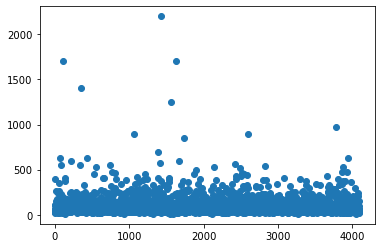

In [83]:
plt.scatter(range(len(xtrain)),ytrain)
plt.show()

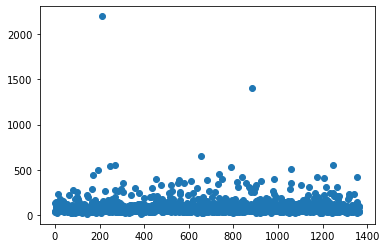

In [84]:
plt.scatter(range(len(xtest)), ytest)
plt.show()

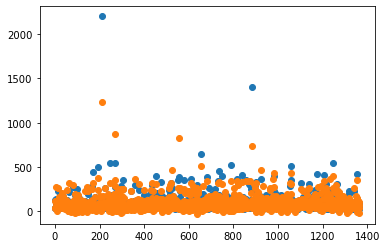

In [85]:
plt.scatter(range(len(xtest)), ytest)
plt.scatter(range(len(xtest)), ytest_pred)
plt.show()

In [86]:
prediction = np.hstack((ytest.values.reshape(-1,1), ytest_pred.reshape(-1,1)))
prediction

array([[ 42.73      ,  43.38542175],
       [ 36.4       ,  35.97439575],
       [130.        , 114.25001526],
       ...,
       [ 45.        ,  40.98451233],
       [ 85.        ,  76.15977478],
       [ 27.        , -20.10903931]])

In [87]:
prediction[:20,:]

array([[ 42.73      ,  43.38542175],
       [ 36.4       ,  35.97439575],
       [130.        , 114.25001526],
       [142.        , 276.5221405 ],
       [ 95.        ,  56.55882263],
       [ 82.        , 101.31544495],
       [ 91.86      , 118.64572144],
       [ 51.91      ,  61.2323761 ],
       [ 36.8       ,  26.68159485],
       [ 24.        ,   2.86790466],
       [ 52.45      ,  75.83175659],
       [ 40.        ,  52.57437134],
       [229.        , 261.6532135 ],
       [103.        , 131.79598999],
       [ 59.        ,  56.89025879],
       [ 57.        ,  83.89642334],
       [ 63.58      ,  63.04420471],
       [ 72.        ,  56.90042114],
       [ 60.        ,  84.09512329],
       [125.        , 167.31033325]])

In [88]:
xtest.values[47]

array([2.00e+00, 1.02e+03, 2.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00])

In [89]:
# Now let's create a function for the prediction of the price by accepting the features

xtrain.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'Others',
       'Super built-up  Area', '7th Phase JP Nagar', '8th Phase JP Nagar',
       'Akshaya Nagar', 'Banashankari', 'Bannerghatta Road', 'Begur Road',
       'Bellandur', 'Bisuvanahalli', 'Budigere', 'Chandapura',
       'Electronic City', 'Electronic City Phase II',
       'Electronics City Phase 1', 'Haralur Road', 'Harlur', 'Hebbal',
       'Hennur', 'Hennur Road', 'Hoodi', 'Hormavu', 'Hosa Road', 'JP Nagar',
       'Jakkur', 'Jalahalli', 'KR Puram', 'Kaggadasapura', 'Kanakpura Road',
       'Kasavanhalli', 'Kengeri', 'Koramangala', 'Kothanur', 'Malleshwaram',
       'Marathahalli', 'Nagarbhavi', 'Old Madras Road', 'Panathur',
       'Rachenahalli', 'Raja Rajeshwari Nagar', 'Rajaji Nagar',
       'Ramamurthy Nagar', 'Sarjapur', 'Sarjapur  Road', 'TC Palaya',
       'Thanisandra', 'Thigalarapalya', 'Uttarahalli', 'Varthur', 'Whitefield',
       'Yelahanka', 'Yeshwanthpur'],
      dtype='object')

In [90]:
# let's create the 0s array of the size of xtrain columns

input = np.array([len(xtrain.columns)])
input

array([56])

In [102]:
size = 3
total_sqft = 1421
bath = 4
balcony = 3
area_type = 'Super built-up  Area'
location = 'Thanisandra'

input = np.zeros(len(xtrain.columns))

input[0] = size
input[1] = total_sqft
input[2] = bath
input[3] = balcony

input[np.where(xtrain.columns == area_type)[0][0]] = 1
input[np.where(xtrain.columns == location)[0][0]] = 1

print(lmodel.predict([input]))

[80.8175354]


In [106]:
# Let's make its function 

def price_prediction(size, total_sqft, bath, balcony, area_type, location):
    input = np.zeros(len(xtrain.columns))

    input[0] = size
    input[1] = total_sqft
    input[2] = bath
    input[3] = balcony

    input[np.where(xtrain.columns == area_type)[0][0]] = 1
    input[np.where(xtrain.columns == location)[0][0]] = 1
    
    return(lmodel.predict([input]))
    

In [107]:
print(price_prediction(3, 1000, 3, 2, 'Others', 'Raja Rajeshwari Nagar'))

[23.18919373]
